In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we import the datasets which are given in the folder.

## Data Preprocessing

In [5]:
housingRaw = pd.read_csv('/content/drive/MyDrive/CS5228Project/Datasets/train.csv')
housing = housingRaw

In [6]:
df_train_Lu = pd.read_pickle("/content/drive/MyDrive/CS5228Project/data/MrLu_train_df.pkl")

df_train_Lu.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,latitude,longitude,...,long_rads,num_top_sch_1km,num_top_sch_2km,num_good_sch_1km,num_good_sch_2km,num_normal_sch_1km,num_normal_sch_2km,age,age_bin,shortest_dist_mall
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1.344518,103.738630,...,1.810581,1,1,0,2,2,4,40,6,1.202674
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1.330186,103.938717,...,1.814073,1,2,1,1,3,6,45,7,1.114338
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1.332242,103.845643,...,1.812448,1,4,0,1,1,3,52,9,0.468297
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1.370239,103.962894,...,1.814495,0,0,2,2,1,4,30,4,0.402359
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1.320502,103.863341,...,1.812757,1,1,0,1,1,2,51,8,1.073354


In [7]:
df_test_Lu = pd.read_pickle("/content/drive/MyDrive/CS5228Project/data/MrLu_test_df.pkl")

In [13]:
df_train_Lu.columns

Index(['rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'furnished', 'latitude', 'longitude',
       'elevation', 'subzone', 'planning_area', 'region', 'monthly_rent',
       'lat_rads', 'long_rads', 'num_top_sch_1km', 'num_top_sch_2km',
       'num_good_sch_1km', 'num_good_sch_2km', 'num_normal_sch_1km',
       'num_normal_sch_2km', 'age', 'age_bin', 'shortest_dist_mall'],
      dtype='object')

In [8]:
housing = df_train_Lu.copy()
housing_codes = housing.copy() #[['rent_approval_date','floor_area_sqm','lease_commence_date','latitude','longitude','monthly_rent']]


d = {}

housing['town'] = housing['town'].astype('category')
d['town'] = dict(enumerate(housing['town'].cat.categories))
housing_codes['town'] = housing['town'].cat.codes
housing_codes['town_reversed'] = housing_codes['town'].map(d['town'])

housing['block'] = housing['block'].astype('category')
d['block'] = dict(enumerate(housing['block'].cat.categories))
housing_codes['block'] = housing['block'].cat.codes
housing_codes['block_reversed'] = housing_codes['block'].map(d['block'])

housing['street_name'] = housing['street_name'].astype('category')
d['street_name'] = dict(enumerate(housing['street_name'].cat.categories))
housing_codes['street_name'] = housing['street_name'].cat.codes
housing_codes['street_name_reversed'] = housing_codes['street_name'].map(d['street_name'])

housing['flat_type'] = housing['flat_type'].astype('category')
d['flat_type'] = dict(enumerate(housing['flat_type'].cat.categories))
housing_codes['flat_type'] = housing['flat_type'].cat.codes
housing_codes['flat_type_reversed'] = housing_codes['flat_type'].map(d['flat_type'])

housing['flat_model'] = housing['flat_model'].astype('category')
d['flat_model'] = dict(enumerate(housing['flat_model'].cat.categories))
housing_codes['flat_model'] = housing['flat_model'].cat.codes
housing_codes['flat_model_reversed'] = housing_codes['flat_model'].map(d['flat_model'])

housing['subzone'] = housing['subzone'].astype('category')
d['subzone'] = dict(enumerate(housing['subzone'].cat.categories))
housing_codes['subzone'] = housing['subzone'].cat.codes
housing_codes['subzone_reversed'] = housing_codes['subzone'].map(d['subzone'])

housing['planning_area'] = housing['planning_area'].astype('category')
d['planning_area'] = dict(enumerate(housing['planning_area'].cat.categories))
housing_codes['planning_area'] = housing['planning_area'].cat.codes
housing_codes['planning_area_reversed'] = housing_codes['planning_area'].map(d['planning_area'])

housing['region'] = housing['region'].astype('category')
d['region'] = dict(enumerate(housing['region'].cat.categories))
housing_codes['region'] = housing['region'].cat.codes
housing_codes['region_reversed'] = housing_codes['region'].map(d['region'])

housing_codes

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,latitude,longitude,...,age_bin,shortest_dist_mall,town_reversed,block_reversed,street_name_reversed,flat_type_reversed,flat_model_reversed,subzone_reversed,planning_area_reversed,region_reversed
0,2021-09,12,545,239,2,10,67.0,yes,1.344518,103.738630,...,6,1.202674,jurong east,257,Jurong East Street 24,3 room,new generation,yuhua east,jurong east,west region
1,2022-05,1,86,577,5,10,92.0,yes,1.330186,103.938717,...,7,1.114338,bedok,119,bedok north road,4-room,new generation,bedok north,bedok,east region
2,2022-10,23,184,827,3,5,67.0,yes,1.332242,103.845643,...,9,0.468297,toa payoh,157,lorong 1 toa payoh,3-room,improved,toa payoh central,toa payoh,central region
3,2021-08,16,529,328,8,3,149.0,yes,1.370239,103.962894,...,4,0.402359,pasir ris,250,Pasir Ris Street 21,executive,apartment,pasir ris drive,pasir ris,east region
4,2022-11,14,939,475,3,5,68.0,yes,1.320502,103.863341,...,8,1.073354,kallang/whampoa,34,Whampoa West,3-room,improved,bendemeer,kallang,central region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,0,1194,12,2,10,67.0,yes,1.366050,103.854168,...,7,0.949719,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,chong boon,ang mo kio,north-east region
59996,2023-04,4,2483,727,5,7,83.0,yes,1.286493,103.821434,...,0,0.740674,bukit merah,95a,henderson road,4-room,model a,henderson hill,bukit merah,central region
59997,2022-06,22,2308,980,7,5,122.0,yes,1.355064,103.936507,...,5,0.439795,tampines,862a,tampines street 83,5-room,improved,tampines west,tampines,east region
59998,2023-01,1,1875,47,7,15,123.0,yes,1.318974,103.944076,...,7,1.775198,bedok,67,Bedok Sth Avenue 3,5-room,standard,bedok south,bedok,east region


In [9]:
housing_test = df_test_Lu.copy()
housing_test_codes = housing_test.copy() #[['rent_approval_date','floor_area_sqm','lease_commence_date','latitude','longitude','monthly_rent']]


d = {}

housing_test['town'] = housing_test['town'].astype('category')
d['town'] = dict(enumerate(housing_test['town'].cat.categories))
housing_test_codes['town'] = housing_test['town'].cat.codes
housing_test_codes['town_reversed'] = housing_test_codes['town'].map(d['town'])

housing_test['block'] = housing_test['block'].astype('category')
d['block'] = dict(enumerate(housing_test['block'].cat.categories))
housing_test_codes['block'] = housing_test['block'].cat.codes
housing_test_codes['block_reversed'] = housing_test_codes['block'].map(d['block'])

housing_test['street_name'] = housing_test['street_name'].astype('category')
d['street_name'] = dict(enumerate(housing_test['street_name'].cat.categories))
housing_test_codes['street_name'] = housing_test['street_name'].cat.codes
housing_test_codes['street_name_reversed'] = housing_test_codes['street_name'].map(d['street_name'])

housing_test['flat_type'] = housing_test['flat_type'].astype('category')
d['flat_type'] = dict(enumerate(housing_test['flat_type'].cat.categories))
housing_test_codes['flat_type'] = housing_test['flat_type'].cat.codes
housing_test_codes['flat_type_reversed'] = housing_test_codes['flat_type'].map(d['flat_type'])

housing_test['flat_model'] = housing_test['flat_model'].astype('category')
d['flat_model'] = dict(enumerate(housing_test['flat_model'].cat.categories))
housing_test_codes['flat_model'] = housing_test['flat_model'].cat.codes
housing_test_codes['flat_model_reversed'] = housing_test_codes['flat_model'].map(d['flat_model'])

housing_test['subzone'] = housing_test['subzone'].astype('category')
d['subzone'] = dict(enumerate(housing_test['subzone'].cat.categories))
housing_test_codes['subzone'] = housing_test['subzone'].cat.codes
housing_test_codes['subzone_reversed'] = housing_test_codes['subzone'].map(d['subzone'])

housing_test['planning_area'] = housing_test['planning_area'].astype('category')
d['planning_area'] = dict(enumerate(housing_test['planning_area'].cat.categories))
housing_test_codes['planning_area'] = housing_test['planning_area'].cat.codes
housing_test_codes['planning_area_reversed'] = housing_test_codes['planning_area'].map(d['planning_area'])

housing_test['region'] = housing_test['region'].astype('category')
d['region'] = dict(enumerate(housing_test['region'].cat.categories))
housing_test_codes['region'] = housing_test['region'].cat.codes
housing_test_codes['region_reversed'] = housing_test_codes['region'].map(d['region'])

housing_test_codes

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,latitude,longitude,...,age_bin,shortest_dist_mall,town_reversed,block_reversed,street_name_reversed,flat_type_reversed,flat_model_reversed,subzone_reversed,planning_area_reversed,region_reversed
0,2023-01,11,506,730,7,4,121.0,yes,1.358411,103.891722,...,6,0.739403,hougang,245,hougang street 22,5-room,improved,lorong ah soo,hougang,north-east region
1,2022-09,19,812,896,5,6,100.0,yes,1.446343,103.820817,...,3,0.254920,sembawang,316,sembawang vista,4-room,model a,sembawang central,sembawang,north region
2,2023-07,9,1943,137,5,9,91.0,yes,1.305719,103.762168,...,7,0.497670,clementi,708,Clementi West Street 2,4-room,new generation,clementi west,clementi,west region
3,2021-08,12,935,235,2,6,74.0,yes,1.344832,103.730778,...,6,1.596397,jurong east,351,Jurong East Street 31,3 room,model a,yuhua west,jurong east,west region
4,2022-03,12,759,768,7,4,121.0,yes,1.345437,103.735241,...,6,1.461487,jurong east,305,jurong east street 32,5-room,improved,yuhua west,jurong east,west region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2022-08,17,1612,691,5,6,92.0,yes,1.403746,103.909883,...,1,0.410801,punggol,615b,edgefield plains,4-room,model a,waterway east,punggol,north-east region
29996,2023-02,19,1298,530,5,6,90.0,yes,1.456113,103.817717,...,2,0.901668,sembawang,491,admiralty link,4-room,model a,sembawang north,sembawang,north region
29997,2023-05,0,1439,544,3,9,68.0,yes,1.373378,103.853043,...,7,0.605097,ang mo kio,524,ang mo kio avenue 5,3-room,new generation,cheng san,ang mo kio,north-east region
29998,2023-02,24,1734,1024,8,5,144.0,yes,1.436986,103.799118,...,3,0.422865,woodlands,656,woodlands ring road,executive,maisonette,woodlands east,woodlands,north region


In [10]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import TweedieRegressor
# from sklearn.linear_model import LassoRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

In [11]:
models = []
models.append(('LinearR', LinearRegression()))
models.append(('PoissonR', PoissonRegressor()))
models.append(('GammaR', GammaRegressor()))
# models.append(('TweedieR', TweedieRegressor()))
# models.append(('LassoR', LassoRegression()))
# models.append(('DecisionTreeR',DecisionTreeRegressor()))
# models.append(('RandomForestFR',RandomForestRegressor()))
# models.append(('GradientBoostingR',GradientBoostingRegressor()))
# models.append(('HistGradientBoostingR',HistGradientBoostingRegressor()))
#

# models.append(('SVM', SVR()))


In [12]:
x_col = ['town', 'flat_type',	"flat_model", 'num_top_sch_1km', 'num_top_sch_2km', 'num_good_sch_1km', 'num_good_sch_2km', 'num_normal_sch_1km', 'num_normal_sch_2km', 'age_bin', 'floor_area_sqm', 'shortest_dist_mall']
y_col = ['monthly_rent']

In [13]:
X = housing_codes[x_col].values
Y = housing_codes[y_col].values
# X_test = housing_test_codes[x_col].values
# Y_test = housing_test_codes[y_col].values
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
from sklearn.model_selection import cross_val_score
# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, Y_train)
    yhat = model.predict(X_test)
    names.append(name)
    scores = cross_val_score(model, X, Y, cv=5, scoring = "neg_mean_squared_error" )
    results.append(np.average(np.sqrt(abs(scores))))
    # results.append(mean_squared_error(Y_test, yhat))
    # print("{} mean_squared_error: {}".format(name, mean_squared_error(Y_test, yhat)))
    print("{} mean_squared_error: {}".format(name, scores))

LinearR mean_squared_error: [-384396.0129829  -379753.03577318 -384489.95112077 -373194.60400872
 -387449.89454744]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning

PoissonR mean_squared_error: [-386391.74648043 -381511.49632561 -385890.77851094 -374943.51660045
 -389211.13339583]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result

GammaR mean_squared_error: [-410724.95344626 -406798.83293519 -413289.65685281 -405175.10072163
 -415410.77319129]


<ipython-input-28-6b3df7fdf350>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names,fontsize=14)


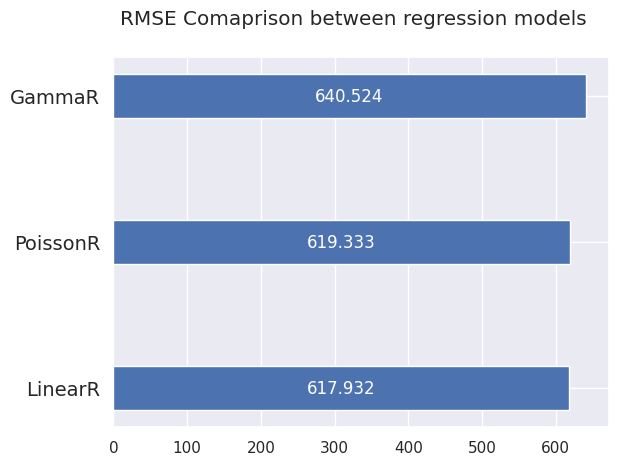

In [28]:
fig = plt.figure()#(figsize=(5,5))
fig.suptitle('RMSE Comaprison between regression models')
ax = fig.add_subplot(111)

p = plt.barh(names,results, align='center', height=0.3)
ax.bar_label(p, label_type='center',color= 'w')
# percentiles = [score.percentile for score in scores_by_test.values()]
# plt.barh(results, percentiles, align='center', height=0.5)
ax.set_yticklabels(names,fontsize=14)
plt.show()